# DATA SCIENCE AND BUSINESS ANALYTICS INTERN AT SPARKS FOUNDATION #GRIPJULY21

# PREDICTION USING SUPERVISED MACHINE LEARNING

## TASK-1 : TO PREDICT THE PERCENTAGE OF A STUDENT BASED ON THE NUMBER OF STUDY HOURS

## AUTHOR : HASHMEET KAUR

## Importing Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
from sklearn import metrics 

## Data Extraction

In [2]:
#Load the data
df=pd.read_csv("Task 1 Supervised Learning.csv")

#Reading the data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Preprocessing

In [3]:
#check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#check the shape of the data
df.shape

(25, 2)

## Data Cleaning 

In [6]:
#To check whether the data contains any null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

###### There are no null values.

## Exploratory Analysis of the Data 

In [5]:
#check summary statistics of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###### Through this summary statistics its clear that least time a student studies is 1 hr and the maximum time is approximately 9hrs. Along with this the highest score achieved is 95.

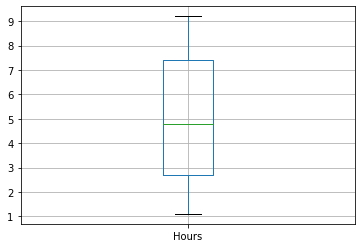

In [7]:
#To check any outliers in the data using boxplot
df.boxplot(["Hours"])
plt.show()

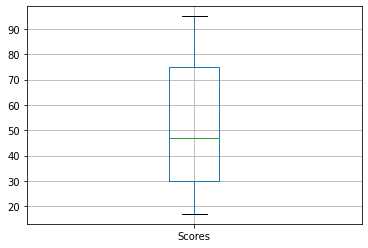

In [8]:
df.boxplot(["Scores"])
plt.show()

<AxesSubplot:>

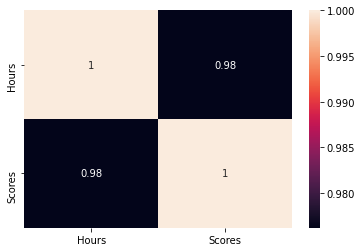

In [9]:
#To check the correlation between the columns
sns.heatmap(df.corr(),annot=True)

###### Hours and Scores are highly positvely correlated to each other.

## Data Visualisation

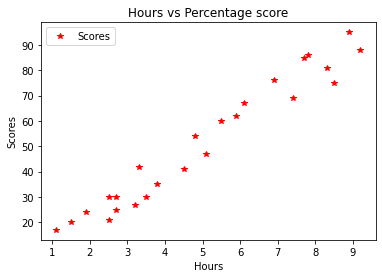

In [10]:
#To visualise the data using Scatter Plot
df.plot(x = 'Hours', y = 'Scores', style = '*',color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Hours vs Percentage score")
plt.show()

###### There is postive linear relationship between number of Hours and Scores obtained.

## Linear Regression

### Preparing the Data

In [11]:
#Tp prepare the data
X = df.drop("Scores",axis=1)  
Y = df["Scores"]

### Training the Model by Splitting into Training and Testing Dataset

In [12]:
#To split the data into test and train data
X_train,X_test,Y_train,Y_test=train_test_split (X,Y,train_size=0.7,test_size=0.3,random_state=4)

In [13]:
#To check the shpae of both traing and testing data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17, 1)
(8, 1)
(17,)
(8,)


### Train the Linear Regression Model

In [14]:
#Fitting the training data
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

### Predict the Scores

In [15]:
#To predict the scores
Y_pred = model.predict(X_test)
Y_pred

array([40.5054997 , 50.46249282, 27.56140864, 87.30336737, 47.47539489,
       79.33777287, 94.27326256, 61.41518526])

In [22]:
#Actual vs Predicted Scores
output = pd.DataFrame({'Actual Score': Y_test,'Predicted Score': Y_pred, 'Residual':Y_test-Y_pred })
print(output)

    Actual Score  Predicted Score   Residual
22            35        40.505500  -5.505500
21            54        50.462493   3.537507
0             21        27.561409  -6.561409
3             75        87.303367 -12.303367
12            41        47.475395  -6.475395
10            85        79.337773   5.662227
6             88        94.273263  -6.273263
11            62        61.415185   0.584815


### Evaluating Test and Train Data scores

In [17]:
#Accuracy of training and testing data 
print('Training Score : ', model.score(X_train, Y_train))
print('Test Score : ', model.score(X_test, Y_test))

Training Score :  0.9622851960701551
Test Score :  0.9151481119722988


### Plotting the Regression Line

Coefficient: [9.95699312]
Intercept: 2.6689258412798367


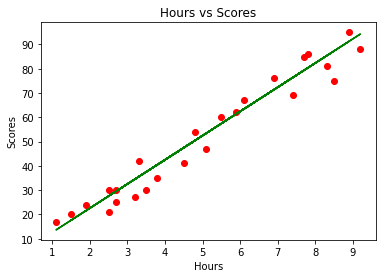

In [23]:
#Plotting the regression line
print("Coefficient:",model.coef_)
print("Intercept:",model.intercept_)
line=model.coef_ * X + model.intercept_
plt.scatter(X,Y, color="red")
plt.plot(X,line,color="green")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

### Now, what will be the score if a student studies 9.25 hours per day ?

In [19]:
hours = float(input('Enter number of hours a student in studying in a day '))

Enter number of hours a student in studying in a day 9.25


In [20]:
pred = model.predict([[hours]])
print("Predicted Score = {}".format((pred)[0]))

Predicted Score = 94.77111221192709


### Model Evaluation Metrics

In [21]:
root_mean_squ_error = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
mean_abs_error = metrics.mean_absolute_error(Y_test, Y_pred)
r_square=metrics.r2_score(Y_test,Y_pred)
print("Root Mean Squred Error:",root_mean_squ_error)
print("Mean absolute Error:",mean_abs_error)
print("R Square:",r_square)

Root Mean Squred Error: 6.62322431294389
Mean absolute Error: 5.862935275773163
R Square: 0.9151481119722988
